In [2]:
!pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=37a72d747932d0eb7c2c0e62a2a23ef3152b6e1357a43631b01d0cae6ea7c3f5
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [3]:
!pip install xgboost

In [4]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 56.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 65.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
b

In [54]:
from datetime import datetime, date,timedelta
from nsepy import get_history
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import warnings
from scipy.stats.mstats import gmean
from scipy.stats import mode
from statistics import harmonic_mean
warnings.simplefilter('ignore')

#### Company Symbols

In [6]:
IT = ["3IINFOLTD","63MOONS","ACCELYA","AIRAN","ALLSEC","APTECHT","AURIONPRO","AURUM","BBOX","DUCON","HCL-INSYS","HCLTECH","HEXAWARE","HGS","HOVS","INFOBEAN","INFY","INSPIRISYS","MASTEK","MPHASIS","NEWGEN","OFSS","ONWARDTEC","PALREDTEC","PANACHE","PERSISTENT","QUICKHEAL","RAMCOSYS","REDINGTON",
"RPSGVENT","RSSOFTWARE","RSYSTEMS""SAKSOFT","SASKEN","SONATSOFTW",
"TAKE",
"TANLA",
"TATAELXSI",
"TCS",
"TECHM",
"TERASOFT",
"TREJHARA",
"TRIGYN",
"TVSELECT","VAKRANGEE","WINPRO","WIPRO",
"XCHANGING","XELPMOC",
"ZENSARTECH","ZENTEC"]


string = "AARTIIND	599.05 -7.35 (-1.21%)	AARTIIND Price Target,ALKALI	167.65 +5.80 (+3.58%)	ALKALI Price Target,ALKYLAMINE	2,718.45 +11.15 (+0.41%)	ALKYLAMINE Price Target,ASTEC	1,700.45 -38.25 (-2.20%)	ASTEC Price Target,BALAMINES	2,550.60 -5.70 (-0.22%)	BALAMINES Price Target,BASF	2,743.10 -48.30 (-1.73%)	BASF Price Target,BAYERCROP	4,732.90 -71.05 (-1.48%)	BAYERCROP Price Target,BHARATRAS	9,521.75 -116.45 (-1.21%)	BHARATRAS Price Target,CAMLINFINE	159.10 -0.90 (-0.56%)	CAMLINFINE Price Target,CHEMBOND	242.90 -3.25 (-1.32%)	CHEMBOND Price Target,CHEMFAB	277.85 +0.10 (+0.04%)	CHEMFAB Price Target,DEEPAKNTR	1,936.55 -7.10 (-0.37%)	DEEPAKNTR Price Target,DHANUKA	721.75 +21.95 (+3.14%)	DHANUKA Price Target,EXCELINDUS	1,170.20 -1.65 (-0.14%)	EXCELINDUS Price Target,FCL	242.90 -3.60 (-1.46%)	FCL Price Target,FINEORG	5,576.65 +7.40 (+0.13%)	FINEORG Price Target,FLUOROCHEM	2,930.85 -63.50 (-2.12%)	FLUOROCHEM Price Target,FOSECOIND	1,879.25 -57.00 (-2.94%)	FOSECOIND Price Target,GALAXYSURF	2,436.95 +6.20 (+0.26%)	GALAXYSURF Price Target,GFLLIMITED	65.05 +0.45 (+0.70%)	GFLLIMITED Price Target,GHCL	527.05 -7.05 (-1.32%)	GHCL Price Target,GODREJIND	451.30 +21.20 (+4.93%)	GODREJIND Price Target,GUJALKALI	750.80 -3.30 (-0.44%)	GUJALKALI Price Target,GULPOLY	250.00 -5.15 (-2.02%)	GULPOLY Price Target,HSCL	95.90 -1.40 (-1.44%)	HSCL Price Target,IGPL	515.05 -3.95 (-0.76%)	IGPL Price Target,INDIAGLYCO	747.50 -3.50 (-0.47%)	INDIAGLYCO Price Target,INSECTICID	727.45 +12.65 (+1.77%)	INSECTICID Price Target,IVP	138.00 +1.70 (+1.25%)	IVP Price Target,JAYAGROGN	179.40 +0.85 (+0.48%)	JAYAGROGN Price Target,JOCIL	195.45 -4.30 (-2.15%)	JOCIL Price Target,KANORICHEM	141.30 -6.10 (-4.14%)	KANORICHEM Price Target,LINDEINDIA	3,364.15 -69.80 (-2.03%)	LINDEINDIA Price Target,MEGH	N.A.	MEGH Price Target,NACLIND	98.75 -4.10 (-3.99%)	NACLIND Price Target,NAVINFLUOR	3,862.90 -80.40 (-2.04%)	NAVINFLUOR Price Target,NEOGEN	1,248.75 -0.25 (-0.02%)	NEOGEN Price Target,OAL	418.35 -8.10 (-1.90%)	OAL Price Target,OMKARCHEM	N.A.	OMKARCHEM Price Target,PANAMAPET	352.60 -1.90 (-0.54%)	PANAMAPET Price Target,PIDILITIND	2,522.30 +4.20 (+0.17%)	PIDILITIND Price Target,PIIND	3,288.15 -40.10 (-1.20%)	PIIND Price Target,PREMEXPLN	408.10 -2.30 (-0.56%)	PREMEXPLN Price Target,PRIVISCL	1,127.35 -1.65 (-0.15%)	PRIVISCL Price Target,PUNJABCHEM	1,086.95 -5.05 (-0.46%)	PUNJABCHEM Price Target,RALLIS	238.15 -6.75 (-2.76%)	RALLIS Price Target,REFEX	267.75 -4.40 (-1.62%)	REFEX Price Target,SEYAIND	33.55 +1.55 (+4.84%)	SEYAIND Price Target,SHARDACROP	493.05 +6.35 (+1.30%)	SHARDACROP Price Target,SHK	141.70 +0.50 (+0.35%)	SHK Price Target,SHREEPUSHK	183.00 -1.95 (-1.05%)	SHREEPUSHK Price Target,SOLARINDS	4,385.40 -21.05 (-0.48%)	SOLARINDS Price Target,SRHHYPOLTD	522.90 -10.20 (-1.91%)	SRHHYPOLTD Price Target,TATACHEM	948.30 +6.15 (+0.65%)	TATACHEM Price Target,TIRUMALCHM	204.30 -2.65 (-1.28%)	TIRUMALCHM Price Target,TNPETRO	90.65 +0.75 (+0.83%)	TNPETRO Price Target,UPL	718.15 -2.15 (-0.30%)	UPL Price Target"

split = string.split(",")
split
CHEM = []
for i in range (len(split)):
    comp = split[i]
    s = ""
    for j in comp:
        if j=="\t" or j.isnumeric():
            break
        else:
            s+=j
    if len(s)!=0:
        CHEM.append(s)
CHEM

['AARTIIND',
 'ALKALI',
 'ALKYLAMINE',
 'ASTEC',
 'BALAMINES',
 'BASF',
 'BAYERCROP',
 'BHARATRAS',
 'CAMLINFINE',
 'CHEMBOND',
 'CHEMFAB',
 'DEEPAKNTR',
 'DHANUKA',
 'EXCELINDUS',
 'FCL',
 'FINEORG',
 'FLUOROCHEM',
 'FOSECOIND',
 'GALAXYSURF',
 'GFLLIMITED',
 'GHCL',
 'GODREJIND',
 'GUJALKALI',
 'GULPOLY',
 'HSCL',
 'IGPL',
 'INDIAGLYCO',
 'INSECTICID',
 'IVP',
 'JAYAGROGN',
 'JOCIL',
 'KANORICHEM',
 'LINDEINDIA',
 'MEGH',
 'NACLIND',
 'NAVINFLUOR',
 'NEOGEN',
 'OAL',
 'OMKARCHEM',
 'PANAMAPET',
 'PIDILITIND',
 'PIIND',
 'PREMEXPLN',
 'PRIVISCL',
 'PUNJABCHEM',
 'RALLIS',
 'REFEX',
 'SEYAIND',
 'SHARDACROP',
 'SHK',
 'SHREEPUSHK',
 'SOLARINDS',
 'SRHHYPOLTD',
 'TATACHEM',
 'TIRUMALCHM',
 'TNPETRO',
 'UPL']

In [7]:
string2 = "3PLAND	25.05 +4.15 (+19.86%)	3PLAND Price Target,AGI	325.90 -7.40 (-2.22%)	AGI Price Target,AHLUCONT	509.00 -4.50 (-0.88%)	AHLUCONT Price Target,AJMERA	311.15 +1.90 (+0.61%)	AJMERA Price Target,AMJLAND	29.20 +1.20 (+4.29%)	AMJLAND Price Target,ANANTRAJ	116.50 +3.10 (+2.73%)	ANANTRAJ Price Target,ANSALAPI	N.A.	ANSALAPI Price Target,ARENTERP	39.75 -0.75 (-1.85%)	ARENTERP Price Target,ARIHANT	N.A.	ARIHANT Price Target,ARIHANTSUP	224.35 -2.35 (-1.04%)	ARIHANTSUP Price Target,ARSSINFRA	22.55 +1.05 (+4.88%)	ARSSINFRA Price Target,ASHIANA	143.75 -2.55 (-1.74%)	ASHIANA Price Target,ASHOKA	85.90 -1.40 (-1.60%)	ASHOKA Price Target,ASIANTILES	48.75 -2.30 (-4.51%)	ASIANTILES Price Target,BHAGYAPROP	N.A.	BHAGYAPROP Price Target,BLKASHYAP	31.95 +0.30 (+0.95%)	BLKASHYAP Price Target,BRIGADE	460.70 +1.85 (+0.40%)	BRIGADE Price Target,BRNL	38.70 -1.35 (-3.37%)	BRNL Price Target,BSELINFRA	N.A.	BSELINFRA Price Target,CAPACITE	160.55 +2.75 (+1.74%)	CAPACITE Price Target,CERA	5,295.95 +31.85 (+0.61%)	CERA Price Target,COUNCODOS	5.00 -0.05 (-0.99%)	COUNCODOS Price Target,DLF	369.75 -3.00 (-0.80%)	DLF Price Target,FMNL	5.45 -0.25 (-4.39%)	FMNL Price Target,GAYAPROJ	8.50 -0.05 (-0.58%)	GAYAPROJ Price Target,GEECEE	153.65 -2.55 (-1.63%)	GEECEE Price Target,GODREJPROP	1,199.85 -12.70 (-1.05%)	GODREJPROP Price Target,GREENLAM	331.50 -0.50 (-0.15%)	GREENLAM Price Target,GREENPANEL	322.00 -4.55 (-1.39%)	GREENPANEL Price Target,HCC	20.85 -0.25 (-1.18%)	HCC Price Target,HGINFRA	667.50 +23.20 (+3.60%)	HGINFRA Price Target,IBREALEST	77.20 -0.60 (-0.77%)	IBREALEST Price Target,ITDCEM	121.30 -0.65 (-0.53%)	ITDCEM Price Target,JKIL	275.45 +3.70 (+1.36%)	JKIL Price Target,JMCPROJECT	125.55 -5.45 (-4.16%)	JMCPROJECT Price Target,JPINFRATEC	N.A.	JPINFRATEC Price Target,KAJARIACER	1,158.30 -23.05 (-1.95%)	KAJARIACER Price Target,KBCGLOBAL	2.75 -0.10 (-3.51%)	KBCGLOBAL Price Target,KNRCON	258.35 -4.65 (-1.77%)	KNRCON Price Target,KOLTEPATIL	266.60 -3.75 (-1.39%)	KOLTEPATIL Price Target,LPDC	7.75 -0.05 (-0.64%)	LPDC Price Target,MADHUCON	5.45 +0.00 (+0.00%)	MADHUCON Price Target,MAHLIFE	362.95 -0.40 (-0.11%)	MAHLIFE Price Target,MANINFRA	72.90 -1.05 (-1.42%)	MANINFRA Price Target,MARATHON	228.30 -0.55 (-0.24%)	MARATHON Price Target,MBLINFRA	25.05 +0.30 (+1.21%)	MBLINFRA Price Target,MURUDCERA	41.00 +0.00 (+0.00%)	MURUDCERA Price Target,NBCC	38.60 -1.20 (-3.02%)	NBCC Price Target,NCC	94.15 +0.90 (+0.97%)	NCC Price Target,NILAINFRA	6.70 -0.15 (-2.19%)	NILAINFRA Price Target,NILASPACES	3.55 +0.05 (+1.43%)	NILASPACES Price Target,NITCO	28.75 +0.60 (+2.13%)	NITCO Price Target,OBEROIRLTY	853.65 -5.30 (-0.62%)	OBEROIRLTY Price Target,OMAXE	70.00 -0.95 (-1.34%)	OMAXE Price Target,ORIENTBELL	524.30 -6.15 (-1.16%)	ORIENTBELL Price Target,PATELENG	18.95 -0.10 (-0.52%)	PATELENG Price Target,PHOENIXLTD	1,416.70 +1.60 (+0.11%)	PHOENIXLTD Price Target,PNCINFRA	317.10 +12.75 (+4.19%)	PNCINFRA Price Target,PODDARHOUS	203.85 -6.10 (-2.91%)	PODDARHOUS Price Target,PRAENG	15.90 -0.30 (-1.85%)	PRAENG Price Target,PRESTIGE	466.55 -6.45 (-1.36%)	PRESTIGE Price Target,PSPPROJECT	742.35 -7.95 (-1.06%)	PSPPROJECT Price Target,PURVA	89.40 -1.60 (-1.76%)	PURVA Price Target,RAMKY	300.30 -4.55 (-1.49%)	RAMKY Price Target,RPPINFRA	42.25 -0.70 (-1.63%)	RPPINFRA Price Target,RUSHIL	404.40 -9.30 (-2.25%)	RUSHIL Price Target,RVNL	72.45 +0.40 (+0.56%)	RVNL Price Target,SADBHAV	14.95 -0.65 (-4.17%)	SADBHAV Price Target,SETUINFRA	1.65 +0.05 (+3.12%)	SETUINFRA Price Target,SHIL	N.A.	SHIL Price Target,SIMPLEXINF	57.95 -0.90 (-1.53%)	SIMPLEXINF Price Target,SOBHA	585.05 +17.55 (+3.09%)	SOBHA Price Target,SOMANYCERA	499.30 -3.10 (-0.62%)	SOMANYCERA Price Target,SPMLINFRA	25.40 -1.00 (-3.79%)	SPMLINFRA Price Target,SUNTECK	349.20 +1.40 (+0.40%)	SUNTECK Price Target,TARMAT	55.90 +2.65 (+4.98%)	TARMAT Price Target,TCIDEVELOP	N.A.	TCIDEVELOP Price Target,TECHIN	10.60 +0.10 (+0.95%)	TECHIN Price Target,TEXINFRA	58.50 -0.45 (-0.76%)	TEXINFRA Price Target,VASCONEQ	33.90 -0.55 (-1.60%)	VASCONEQ Price Target,WELENT	165.00 -4.25 (-2.51%)	WELENT Price Target,ZUARIGLOB	N.A.	ZUARIGLOB Price Target"

split = string2.split(",")
split
CONST = []
for i in range (len(split)):
    comp = split[i]
    s = ""
    for j in comp:
        if j=="\t" or j.isnumeric():
            break
        else:
            s+=j
    if len(s)!=0:
        CONST.append(s)
CONST

['AGI',
 'AHLUCONT',
 'AJMERA',
 'AMJLAND',
 'ANANTRAJ',
 'ANSALAPI',
 'ARENTERP',
 'ARIHANT',
 'ARIHANTSUP',
 'ARSSINFRA',
 'ASHIANA',
 'ASHOKA',
 'ASIANTILES',
 'BHAGYAPROP',
 'BLKASHYAP',
 'BRIGADE',
 'BRNL',
 'BSELINFRA',
 'CAPACITE',
 'CERA',
 'COUNCODOS',
 'DLF',
 'FMNL',
 'GAYAPROJ',
 'GEECEE',
 'GODREJPROP',
 'GREENLAM',
 'GREENPANEL',
 'HCC',
 'HGINFRA',
 'IBREALEST',
 'ITDCEM',
 'JKIL',
 'JMCPROJECT',
 'JPINFRATEC',
 'KAJARIACER',
 'KBCGLOBAL',
 'KNRCON',
 'KOLTEPATIL',
 'LPDC',
 'MADHUCON',
 'MAHLIFE',
 'MANINFRA',
 'MARATHON',
 'MBLINFRA',
 'MURUDCERA',
 'NBCC',
 'NCC',
 'NILAINFRA',
 'NILASPACES',
 'NITCO',
 'OBEROIRLTY',
 'OMAXE',
 'ORIENTBELL',
 'PATELENG',
 'PHOENIXLTD',
 'PNCINFRA',
 'PODDARHOUS',
 'PRAENG',
 'PRESTIGE',
 'PSPPROJECT',
 'PURVA',
 'RAMKY',
 'RPPINFRA',
 'RUSHIL',
 'RVNL',
 'SADBHAV',
 'SETUINFRA',
 'SHIL',
 'SIMPLEXINF',
 'SOBHA',
 'SOMANYCERA',
 'SPMLINFRA',
 'SUNTECK',
 'TARMAT',
 'TCIDEVELOP',
 'TECHIN',
 'TEXINFRA',
 'VASCONEQ',
 'WELENT',
 'ZUARIGL

In [8]:
IRON_AND_STEEL = []

string3 = "APLAPOLLO	1,119.60 -4.30 (-0.38%)	APLAPOLLO Price Target,BHARATWIRE	102.55 -1.75 (-1.68%)	BHARATWIRE Price Target,DPWIRES	414.70 +4.25 (+1.04%)	DPWIRES Price Target,GAL	3.20 +0.05 (+1.59%)	GAL Price Target,GALLANTT	63.10 +0.25 (+0.40%)	GALLANTT Price Target,GALLISPAT	N.A.	GALLISPAT Price Target,GANDHITUBE	527.20 +15.75 (+3.08%)	GANDHITUBE Price Target,GOODLUCK	373.50 -7.75 (-2.03%)	GOODLUCK Price Target,GPIL	389.75 -11.15 (-2.78%)	GPIL Price Target,HISARMETAL	144.65 +2.75 (+1.94%)	HISARMETAL Price Target,HITECH	851.50 +4.15 (+0.49%)	HITECH Price Target,IMFA	272.60 -3.40 (-1.23%)	IMFA Price Target,INCREDIBLE	28.90 +1.10 (+3.96%)	INCREDIBLE Price Target,ISMTLTD	53.30 -1.85 (-3.35%)	ISMTLTD Price Target,JAIBALAJI	54.15 -0.40 (-0.73%)	JAIBALAJI Price Target,JAICORPLTD	142.95 -2.00 (-1.38%)	JAICORPLTD Price Target,JINDALSAW	110.95 -2.75 (-2.42%)	JINDALSAW Price Target,JINDALSTEL	591.10 -2.45 (-0.41%)	JINDALSTEL Price Target,JSL	239.30 +1.65 (+0.69%)	JSL Price Target,JSLHISAR	436.10 -3.85 (-0.88%)	JSLHISAR Price Target,JSWISPL	31.10 -0.90 (-2.81%)	JSWISPL Price Target,JSWSTEEL	728.35 -22.35 (-2.98%)	JSWSTEEL Price Target,KAMDHENU	384.10 +5.65 (+1.49%)	KAMDHENU Price Target,KIRLFER	346.80 -7.30 (-2.06%)	KIRLFER Price Target,KSL	361.45 -10.70 (-2.88%)	KSL Price Target,LSIL	16.45 -0.35 (-2.08%)	LSIL Price Target,MAHASTEEL	69.70 -0.75 (-1.06%)	MAHASTEEL Price Target,MAHSEAMLES	318.60 -11.70 (-3.54%)	MAHSEAMLES Price Target,MANAKSTEEL	35.45 +0.30 (+0.85%)	MANAKSTEEL Price Target,MANINDS	79.35 +1.75 (+2.26%)	MANINDS Price Target,MIDHANI	218.40 -0.55 (-0.25%)	MIDHANI Price Target,MSPL	9.75 -0.05 (-0.51%)	MSPL Price Target,MUKANDLTD	131.45 +0.85 (+0.65%)	MUKANDLTD Price Target,OISL	N.A.	OISL Price Target,PENIND	56.25 -1.30 (-2.26%)	PENIND Price Target,PRAKASHSTL	4.90 -0.05 (-1.01%)	PRAKASHSTL Price Target,PSL	N.A.	PSL Price Target,RAMASTEEL	38.15 -135.40 (-78.02%)	RAMASTEEL Price Target,RATNAMANI	2,030.05 -43.55 (-2.10%)	RATNAMANI Price Target,SAIL	85.90 -1.50 (-1.72%)	SAIL Price Target,SARDAEN	1,092.65 -14.10 (-1.27%)	SARDAEN Price Target,SHAHALLOYS	68.25 -0.95 (-1.37%)	SHAHALLOYS Price Target,SRIPIPES	N.A.	SRIPIPES Price Target,SUNFLAG	113.00 -2.05 (-1.78%)	SUNFLAG Price Target,SURYAROSNI	551.35 -9.45 (-1.69%)	SURYAROSNI Price Target,TATAMETALI	820.65 -4.50 (-0.55%)	TATAMETALI Price Target,TATASTEEL	115.65 -0.90 (-0.77%)	TATASTEEL Price Target,TATASTLBSL	N.A.	TATASTLBSL Price Target,TATASTLLP	691.25 -8.75 (-1.25%)	TATASTLLP Price Target,TIIL	907.35 +9.80 (+1.09%)	TIIL Price Target,USHAMART	177.20 -5.35 (-2.93%)	USHAMART Price Target,UTTAMSTL	N.A.	UTTAMSTL Price Target,UVSL	N.A.	UVSL Price Target,VASWANI	18.25 +0.05 (+0.27%)	VASWANI Price Target,VISASTEEL	15.05 +0.00 (+0.00%)	VISASTEEL Price Target,VSSL	303.80 -7.65 (-2.46%)	VSSL Price Target,WELCORP	218.75 -7.65 (-3.38%)	WELCORP Price Target,ZENITHSTL	5.70 -0.05 (-0.87%)	ZENITHSTL Price Target"

split = string3.split(",")
split
for i in range (len(split)):
    comp = split[i]
    s = ""
    for j in comp:
        if j=="\t" or j.isnumeric():
            break
        else:
            s+=j
    if len(s)!=0:
        IRON_AND_STEEL.append(s)
IRON_AND_STEEL

['APLAPOLLO',
 'BHARATWIRE',
 'DPWIRES',
 'GAL',
 'GALLANTT',
 'GALLISPAT',
 'GANDHITUBE',
 'GOODLUCK',
 'GPIL',
 'HISARMETAL',
 'HITECH',
 'IMFA',
 'INCREDIBLE',
 'ISMTLTD',
 'JAIBALAJI',
 'JAICORPLTD',
 'JINDALSAW',
 'JINDALSTEL',
 'JSL',
 'JSLHISAR',
 'JSWISPL',
 'JSWSTEEL',
 'KAMDHENU',
 'KIRLFER',
 'KSL',
 'LSIL',
 'MAHASTEEL',
 'MAHSEAMLES',
 'MANAKSTEEL',
 'MANINDS',
 'MIDHANI',
 'MSPL',
 'MUKANDLTD',
 'OISL',
 'PENIND',
 'PRAKASHSTL',
 'PSL',
 'RAMASTEEL',
 'RATNAMANI',
 'SAIL',
 'SARDAEN',
 'SHAHALLOYS',
 'SRIPIPES',
 'SUNFLAG',
 'SURYAROSNI',
 'TATAMETALI',
 'TATASTEEL',
 'TATASTLBSL',
 'TATASTLLP',
 'TIIL',
 'USHAMART',
 'UTTAMSTL',
 'UVSL',
 'VASWANI',
 'VISASTEEL',
 'VSSL',
 'WELCORP',
 'ZENITHSTL']

In [9]:
string4 = "AARVEEDEN	26.00 -0.35 (-1.33%)	AARVEEDEN Price Target,AMBIKCO	1,523.60 -45.70 (-2.91%)	AMBIKCO Price Target,ARVIND	86.40 +1.20 (+1.41%)	ARVIND Price Target,ARVINDFASN	336.55 -6.55 (-1.91%)	ARVINDFASN Price Target,ASHIMASYN	17.40 +0.00 (+0.00%)	ASHIMASYN Price Target,AYMSYNTEX	73.50 -0.50 (-0.68%)	AYMSYNTEX Price Target,BANG	47.30 -0.55 (-1.15%)	BANG Price Target,BASML	53.35 -1.40 (-2.56%)	BASML Price Target,BHANDARI	5.90 +0.05 (+0.85%)	BHANDARI Price Target,BOMDYEING	77.00 -1.70 (-2.16%)	BOMDYEING Price Target,BRFL	N.A.	BRFL Price Target,BSL	191.65 +1.30 (+0.68%)	BSL Price Target,CANTABIL	1,213.20 +7.05 (+0.58%)	CANTABIL Price Target,CELEBRITY	17.85 -0.05 (-0.28%)	CELEBRITY Price Target,CENTENKA	416.10 -4.85 (-1.15%)	CENTENKA Price Target,CNOVAPETRO	N.A.	CNOVAPETRO Price Target,DAMODARIND	58.00 +2.20 (+3.94%)	DAMODARIND Price Target,DCM	80.80 -0.80 (-0.98%)	DCM Price Target,DCMNVL	163.15 +0.95 (+0.59%)	DCMNVL Price Target,DOLLAR	415.60 -5.60 (-1.33%)	DOLLAR Price Target,DONEAR	105.90 +12.55 (+13.44%)	DONEAR Price Target,EUROTEXIND	15.35 +0.70 (+4.78%)	EUROTEXIND Price Target,FILATEX	43.05 -1.10 (-2.49%)	FILATEX Price Target,GANECOS	896.45 -16.85 (-1.84%)	GANECOS Price Target,GARFIBRES	3,072.20 -53.35 (-1.71%)	GARFIBRES Price Target,GINNIFILA	32.55 -0.35 (-1.06%)	GINNIFILA Price Target,GOKEX	362.60 -5.20 (-1.41%)	GOKEX Price Target,GTNTEX	N.A.	GTNTEX Price Target,HIMATSEIDE	80.05 -0.90 (-1.11%)	HIMATSEIDE Price Target,ICIL	133.20 -2.45 (-1.81%)	ICIL Price Target,INDORAMA	57.70 -1.15 (-1.95%)	INDORAMA Price Target,INDTERRAIN	74.45 +2.50 (+3.47%)	INDTERRAIN Price Target,JBFIND	8.90 +0.00 (+0.00%)	JBFIND Price Target,JINDWORLD	451.15 +5.35 (+1.20%)	JINDWORLD Price Target,KITEX	189.20 -1.15 (-0.60%)	KITEX Price Target,KPRMILL	518.55 -10.90 (-2.06%)	KPRMILL Price Target,LAMBODHARA	140.20 +14.05 (+11.14%)	LAMBODHARA Price Target,LOVABLE	132.80 +0.15 (+0.11%)	LOVABLE Price Target,LUXIND	1,607.70 -11.05 (-0.68%)	LUXIND Price Target,MARALOVER	63.85 -0.85 (-1.31%)	MARALOVER Price Target,MOHITIND	16.85 +0.25 (+1.51%)	MOHITIND Price Target,MONTECARLO	683.05 -8.05 (-1.16%)	MONTECARLO Price Target,MORARJEE	23.45 +1.45 (+6.59%)	MORARJEE Price Target,NAGREEKEXP	40.65 +0.35 (+0.87%)	NAGREEKEXP Price Target,NAHARINDUS	107.55 -0.10 (-0.09%)	NAHARINDUS Price Target,NAHARPOLY	258.75 -4.55 (-1.73%)	NAHARPOLY Price Target,NAHARSPING	279.10 +2.45 (+0.89%)	NAHARSPING Price Target,NDL	25.10 -0.35 (-1.38%)	NDL Price Target,NITINSPIN	204.90 -1.50 (-0.73%)	NITINSPIN Price Target,ORBTEXP	158.20 +1.30 (+0.83%)	ORBTEXP Price Target,PAGEIND	41,710.15 -592.75 (-1.40%)	PAGEIND Price Target,PATSPINLTD	N.A.	PATSPINLTD Price Target,PDSL	344.65 -4.15 (-1.19%)	PDSL Price Target,PGIL	393.75 -3.40 (-0.86%)	PGIL Price Target,PIONEEREMB	42.70 +0.55 (+1.30%)	PIONEEREMB Price Target,PRECOT	192.00 +0.70 (+0.37%)	PRECOT Price Target,RAYMOND	1,445.55 -33.85 (-2.29%)	RAYMOND Price Target,RSWM	189.60 +2.10 (+1.12%)	RSWM Price Target,RUBYMILLS	198.95 +0.55 (+0.28%)	RUBYMILLS Price Target,RUPA	283.60 +4.95 (+1.78%)	RUPA Price Target,SALONA	261.20 -2.70 (-1.02%)	SALONA Price Target,SARLAPOLY	46.60 +1.35 (+2.98%)	SARLAPOLY Price Target,SGL	17.95 -0.25 (-1.37%)	SGL Price Target,SHIVAMILLS	98.45 +4.45 (+4.73%)	SHIVAMILLS Price Target,SHIVATEX	122.95 +2.45 (+2.03%)	SHIVATEX Price Target,SIYSIL	513.55 -12.55 (-2.39%)	SIYSIL Price Target,SOMATEX	9.60 +0.45 (+4.92%)	SOMATEX Price Target,SPAL	317.85 -3.50 (-1.09%)	SPAL Price Target,SPLIL	75.80 -0.95 (-1.24%)	SPLIL Price Target,SRF	2,238.65 -28.25 (-1.25%)	SRF Price Target,STINDIA	N.A.	STINDIA Price Target,SURYALAXMI	57.55 -0.90 (-1.54%)	SURYALAXMI Price Target,SUTLEJTEX	61.70 -2.25 (-3.52%)	SUTLEJTEX Price Target,SWANENERGY	310.85 -11.35 (-3.52%)	SWANENERGY Price Target,TCNSBRANDS	518.20 -6.80 (-1.30%)	TCNSBRANDS Price Target,TRIDENT	33.70 -0.35 (-1.03%)	TRIDENT Price Target,TTL	86.05 +0.20 (+0.23%)	TTL Price Target,VARDHACRLC	54.20 +0.60 (+1.12%)	VARDHACRLC Price Target,VIPCLOTHNG	47.45 +1.15 (+2.48%)	VIPCLOTHNG Price Target,VTL	309.75 -4.25 (-1.35%)	VTL Price Target,WEIZMANIND	116.10 +16.00 (+15.98%)	WEIZMANIND Price Target,WELSPUNIND	72.15 -1.85 (-2.50%)	WELSPUNIND Price Target,ZODIACLOTH	98.30 -1.30 (-1.31%)	ZODIACLOTH Price Target"

TEXTILE = []

split = string4.split(",")
split
for i in range (len(split)):
    comp = split[i]
    s = ""
    for j in comp:
        if j=="\t" or j.isnumeric():
            break
        else:
            s+=j
    if len(s)!=0:
        TEXTILE.append(s)
TEXTILE

['AARVEEDEN',
 'AMBIKCO',
 'ARVIND',
 'ARVINDFASN',
 'ASHIMASYN',
 'AYMSYNTEX',
 'BANG',
 'BASML',
 'BHANDARI',
 'BOMDYEING',
 'BRFL',
 'BSL',
 'CANTABIL',
 'CELEBRITY',
 'CENTENKA',
 'CNOVAPETRO',
 'DAMODARIND',
 'DCM',
 'DCMNVL',
 'DOLLAR',
 'DONEAR',
 'EUROTEXIND',
 'FILATEX',
 'GANECOS',
 'GARFIBRES',
 'GINNIFILA',
 'GOKEX',
 'GTNTEX',
 'HIMATSEIDE',
 'ICIL',
 'INDORAMA',
 'INDTERRAIN',
 'JBFIND',
 'JINDWORLD',
 'KITEX',
 'KPRMILL',
 'LAMBODHARA',
 'LOVABLE',
 'LUXIND',
 'MARALOVER',
 'MOHITIND',
 'MONTECARLO',
 'MORARJEE',
 'NAGREEKEXP',
 'NAHARINDUS',
 'NAHARPOLY',
 'NAHARSPING',
 'NDL',
 'NITINSPIN',
 'ORBTEXP',
 'PAGEIND',
 'PATSPINLTD',
 'PDSL',
 'PGIL',
 'PIONEEREMB',
 'PRECOT',
 'RAYMOND',
 'RSWM',
 'RUBYMILLS',
 'RUPA',
 'SALONA',
 'SARLAPOLY',
 'SGL',
 'SHIVAMILLS',
 'SHIVATEX',
 'SIYSIL',
 'SOMATEX',
 'SPAL',
 'SPLIL',
 'SRF',
 'STINDIA',
 'SURYALAXMI',
 'SUTLEJTEX',
 'SWANENERGY',
 'TCNSBRANDS',
 'TRIDENT',
 'TTL',
 'VARDHACRLC',
 'VIPCLOTHNG',
 'VTL',
 'WEIZMANIND',
 'W

In [10]:
print(len(IT))
print(len(CHEM))
print(len(IRON_AND_STEEL))
print(len(TEXTILE))
print(len(CONST))

50
57
58
83
81


## GETTING THE DATA

In [13]:
start= date.today() + timedelta(-730)
end=date.today()

sample = get_history(symbol="INFY",start=start,end=end)
sample.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2023-01-03,INFY,EQ,1524.00,1519.85,1532.65,1515.10,1521.00,1522.55,1526.71,4551130,6.948268e+14,118266,3255898,0.7154
2023-01-04,INFY,EQ,1522.55,1521.00,1521.00,1491.10,1494.95,1494.80,1501.49,7059590,1.059994e+15,213900,5091489,0.7212
2023-01-05,INFY,EQ,1494.80,1505.90,1505.90,1469.25,1475.60,1475.20,1481.40,9868404,1.461908e+15,294920,7577717,0.7679
2023-01-06,INFY,EQ,1475.20,1470.00,1475.00,1446.50,1449.80,1448.50,1457.41,6443714,9.391109e+14,254921,4527609,0.7026
2023-01-09,INFY,EQ,1448.50,1448.20,1489.35,1448.20,1485.50,1484.45,1477.72,11498717,1.699192e+15,269942,8401110,0.7306


In [14]:
sample.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.995765,0.993684,0.992764,0.989686,0.989652,0.992535,-0.133192,0.081099,0.032295,-0.014811,0.384843
Open,0.995765,1.000000,0.997175,0.996640,0.993495,0.993335,0.996231,-0.147745,0.068130,-0.000719,-0.033353,0.374720
High,0.993684,0.997175,1.000000,0.997145,0.997497,0.997399,0.999003,-0.129332,0.087747,0.009624,-0.019255,0.360786
Low,0.992764,0.996640,0.997145,1.000000,0.997694,0.997805,0.999002,-0.172643,0.043520,-0.030031,-0.058435,0.376058
Last,0.989686,0.993495,0.997497,0.997694,1.000000,0.999867,0.998957,-0.152255,0.064223,-0.016341,-0.043117,0.362294
Close,0.989652,0.993335,0.997399,0.997805,0.999867,1.000000,0.999029,-0.155613,0.060749,-0.019015,-0.046659,0.362403
VWAP,0.992535,0.996231,0.999003,0.999002,0.998957,0.999029,1.000000,-0.150808,0.066073,-0.012157,-0.039837,0.366042
Volume,-0.133192,-0.147745,-0.129332,-0.172643,-0.152255,-0.155613,-0.150808,1.000000,0.970374,0.799768,0.928185,-0.152445
Turnover,0.081099,0.068130,0.087747,0.043520,0.064223,0.060749,0.066073,0.970374,1.000000,0.804427,0.933783,-0.065567
Trades,0.032295,-0.000719,0.009624,-0.030031,-0.016341,-0.019015,-0.012157,0.799768,0.804427,1.000000,0.790432,-0.031140


In [15]:
def preprocess(data):
    data.index = pd.to_datetime(data.index)
    
    df=pd.date_range(start=start,end=end,freq='D')
    df=pd.DataFrame(df)
    df.columns=['date']
    #df["date"]=pd.to_datetime(df["date"])
   
    
   
    data = pd.merge(data,df,how='right',right_on='date',left_on='Date')
    
    
    data.set_index(data['date'],inplace=True)
    #data.rename(index={'date':'Date'},inplace=True)
    data.fillna(method='bfill',inplace=True)
    
    #gives daily returns based on close price
    #data['Returns'] = data['Close'].pct_change()
    data['Returns'] = ((data['Close']-data['Open'])/(data['Open']))*100
    
    #removing all columns expect stock returns
    #data.drop(columns=data.columns[:-1],inplace=True)
    data = data.drop(columns=["Symbol","Series","date","Low","Last","Open","Prev Close","VWAP","Turnover","Trades","Deliverable Volume"])
    
    #removing the null values from the data
    data.dropna(inplace=True)
    
    print(data.head())
    #print(data['Returns'].sum())
    
    
    
    return data

In [16]:
print(sample.info())
sample = preprocess(sample)
print(sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 2021-01-11 to 2023-01-09
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              496 non-null    object 
 1   Series              496 non-null    object 
 2   Prev Close          496 non-null    float64
 3   Open                496 non-null    float64
 4   High                496 non-null    float64
 5   Low                 496 non-null    float64
 6   Last                496 non-null    float64
 7   Close               496 non-null    float64
 8   VWAP                496 non-null    float64
 9   Volume              496 non-null    int64  
 10  Turnover            496 non-null    float64
 11  Trades              496 non-null    int64  
 12  Deliverable Volume  496 non-null    int64  
 13  %Deliverble         496 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 58.1+ KB
None
               High    Close    

### Testing out our model using plots, as stock accuracy may be off the rails due to difference in day of prediction 

In [17]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [18]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    #model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    model.add(Dense(units=1))
    
    return model

In [19]:
sc = StandardScaler()

mm = MinMaxScaler()

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

#### Example 1 - INFY 

               High    Close      Volume  %Deliverble   Returns
date                                                           
2021-01-10  1383.35  1376.20  20528626.0       0.3135  2.540794
2021-01-11  1383.35  1376.20  20528626.0       0.3135  2.540794
2021-01-12  1378.00  1371.75   8309868.0       0.4398 -0.453556
2021-01-13  1392.80  1387.15  14442997.0       0.4494  0.968082
2021-01-14  1384.00  1370.50  27521697.0       0.3768  0.772059


2023-01-10 06:32:08.562021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 06:32:08.563035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 06:32:08.693245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 06:32:08.694257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 06:32:08.695130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/10


2023-01-10 06:32:17.776138: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


18/18 [==============================] - 7s 6ms/step - loss: 1.6096
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 1.6065
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 1.6050
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 1.6048
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 1.6048
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 1.6000
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 1.6027
Epoch 8/10
18/18 [==============================] - 0s 7ms/step - loss: 1.6031
Epoch 9/10
18/18 [==============================] - 0s 7ms/step - loss: 1.6028
Epoch 10/10
18/18 [==============================] - 0s 7ms/step - loss: 1.6032


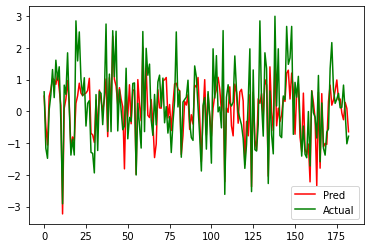

Predicted ROI 0.28156335953697237
Actual ROI 0.16913946587536552


In [20]:
symbol = "INFY"
    
#getting the data from NSE
data = get_history(symbol=symbol, start=start, end=end)
#plt.plot(data['Close'])
    
#making the index of the data to DateTime
#data.index = pd.to_datetime(data.index)
    
data=preprocess(data)
    
#print(data.info())
    
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
    
    
if len(x)>0 and len(y)>0:
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.25)

        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        model = LSTM_model()
        model.compile(optimizer='adam', 
                  loss='mean_squared_error')

        #checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 2, save_best_only = True)
        lr = LinearRegression()

        lr.fit(x_train,y_train)
        
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

        model.fit(x_train, y_train, epochs=10, batch_size = 32)

        y_pred_linear = lr.predict(x_test)
        
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

        y_pred_lstm = model.predict(x_test)

        y_pred_lstm = np.reshape(y_pred_lstm,y_pred_lstm.shape[0])

        y_pred = y_pred_linear + y_pred_lstm

        plt.plot(y_pred,c="red",label="Pred")
        plt.plot(y_test,c="green",label = "Actual")
        plt.legend()
        plt.show()

        print("Predicted ROI", np.median(y_pred))
        print("Actual ROI", np.median(y_test))

#### Example 2 - SBIN

              High   Close      Volume  %Deliverble   Returns
date                                                         
2021-01-10  288.20  282.50  29703173.0       0.2996 -1.909722
2021-01-11  288.20  282.50  29703173.0       0.2996 -1.909722
2021-01-12  293.85  292.50  44307145.0       0.3336  4.464286
2021-01-13  308.00  306.80  78042133.0       0.2015  3.648649
2021-01-14  309.25  307.25  40123498.0       0.2919  0.179328
Epoch 1/10
18/18 [==============================] - 4s 7ms/step - loss: 3.1897
Epoch 2/10
18/18 [==============================] - 0s 7ms/step - loss: 3.1857
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 3.1839
Epoch 4/10
18/18 [==============================] - 0s 13ms/step - loss: 3.1899
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 3.1842
Epoch 6/10
18/18 [==============================] - 0s 9ms/step - loss: 3.1766
Epoch 7/10
18/18 [==============================] - 0s 10ms/step - loss: 3.1801
Epoch 8/10


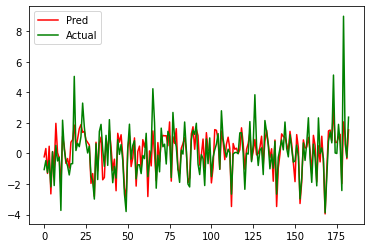

Predicted ROI 0.4129624167411687
Actual ROI 0.03450258769407183


In [21]:
symbol = "SBIN"
#getting the data from NSE
data = get_history(symbol=symbol, start=start, end=end)
#plt.plot(data['Close'])
    
#making the index of the data to DateTime
#data.index = pd.to_datetime(data.index)
    
data=preprocess(data)
#data = data.drop(columns = ["date"])
    
#print(data.info())
    
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
    
    
if len(x)>0 and len(y)>0:
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.25)

        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        model = LSTM_model()
        model.compile(optimizer='adam', 
                  loss='mean_squared_error')

        #checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 2, save_best_only = True)

        lr = LinearRegression()

        lr.fit(x_train,y_train)
        
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

        model.fit(x_train, y_train, epochs=10, batch_size = 32)

        y_pred_linear = lr.predict(x_test)
        
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

        y_pred_lstm = model.predict(x_test)

        y_pred_lstm = np.reshape(y_pred_lstm,y_pred_lstm.shape[0])
        
        y_pred = y_pred_linear + y_pred_lstm

        plt.plot(y_pred,c="red",label="Pred")
        plt.plot(y_test,c="green",label="Actual")
        plt.legend()
        plt.show()

        print("Predicted ROI", np.median(y_pred))
        print("Actual ROI", np.median(y_test))

#### Example 3 - TATAMOTORS

             High   Close       Volume  %Deliverble    Returns
date                                                          
2021-01-10  225.4  220.65  182483100.0       0.1402  10.380190
2021-01-11  225.4  220.65  182483100.0       0.1402  10.380190
2021-01-12  252.4  237.80  390577839.0       0.0593   4.757709
2021-01-13  248.8  242.60  164649387.0       0.0850  -0.123508
2021-01-14  249.8  245.10   86819519.0       0.1086   0.926498
Epoch 1/10
18/18 [==============================] - 4s 7ms/step - loss: 5.3036
Epoch 2/10
18/18 [==============================] - 0s 7ms/step - loss: 5.2757
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 5.2668
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 5.2788
Epoch 5/10
18/18 [==============================] - 0s 7ms/step - loss: 5.2627
Epoch 6/10
18/18 [==============================] - 0s 6ms/step - loss: 5.2428
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 5.2478
Epoch 

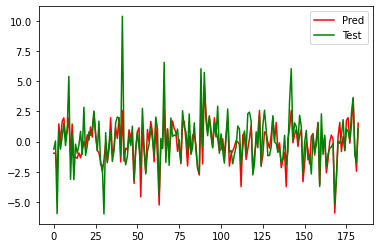

Predicted ROI 0.017876211750940285
Actual ROI -0.1541782300339192


In [22]:
symbol = "TATAMOTORS"
    
#getting the data from NSE
data = get_history(symbol=symbol, start=start, end=end)
#plt.plot(data['Close'])
    
#making the index of the data to DateTime
#data.index = pd.to_datetime(data.index)
    
data=preprocess(data)
#data = data.drop(columns = ["date"])
    
#print(data.info())
    
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
    
    
if len(x)>0 and len(y)>0:
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.25)

        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        model = LSTM_model()
        model.compile(optimizer='adam', 
                  loss='mean_squared_error')

        checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                                   verbose = 2, 
                                   save_best_only = True)

        lr = LinearRegression()

        lr.fit(x_train,y_train)
        
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

        model.fit(x_train, y_train, epochs=10, batch_size = 32)

        y_pred_linear = lr.predict(x_test)
        
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

        y_pred_lstm = model.predict(x_test)

        y_pred_lstm = np.reshape(y_pred_lstm,y_pred_lstm.shape[0])

        y_pred = y_pred_linear + y_pred_lstm

        plt.plot(y_pred,c="red",label="Pred")
        plt.plot(y_test,c="green",label="Test")
        plt.legend()
        plt.show()

        print("Predicted ROI", np.median(y_pred))
        print("Actual ROI", np.median(y_test))

## FUNCTIONS TO PREDICT FEATURES OF NEXT 90 DAYS

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from xgboost import DMatrix
import lightgbm as lgb

    
def preprocessing(data,start,end):
    
    #generating new datarame
    df=pd.date_range(start=start,end=end,freq='D')
    df=pd.DataFrame(df)
    df.columns=['date']
    
    df['date'] = pd.to_datetime(df['date'])
    data.index= pd.to_datetime(data.index)
    
    data = pd.merge(df,data,how='left',right_on='Date',left_on='date')
    
    data.set_index(data['date'],inplace=True)
    data.fillna(method='bfill',inplace=True)
    
    #removing the null values from the data
    #data.dropna(inplace=True)
    
    return data

def exclude_feature(data,col):
    
    columns=list(data.columns)
    columns.remove(col)
    
    data.drop(columns,axis=1,inplace=True)
    
    date_features = pd.DatetimeIndex(data.index)

    data['year'] = date_features.year
    data['month'] = date_features.month
    data['day'] = date_features.day
    data['dayofweek'] = date_features.dayofweek
    
    return data
    
def fit(x):
    params = {'objective':'binary:logistic',
              'eval_metric':'logloss',
              'eta':x[0],
              'subsample':x[1]}
    xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, 
    nfold=5, metrics = 'logloss',seed=42)
    return xgb_cv[-1:].values[0]

def predict_90(dataset,list_of_features):
    #start end as parameters?
    #start date for 90 days can eb extracted from data.tail(1)
    
    start=dataset.tail(1).index[0].date()+ timedelta(days=1)
    end=start + timedelta(days=89)
        
    #new dataframe for storing 90 day predictions
    new_df=pd.date_range(start=start,end=end,freq='D')
    new_df=pd.DataFrame(new_df)
    new_df.columns=['date']

    new_df.set_index(['date'],inplace=True)
    
    #data = get_history(symbol="INFY", start=date(2021,10,1), end=date(2022,9,1))
    
    for col in list_of_features:
        
        print(col)
        
        new_data=pd.date_range(start=start,end=end,freq='D')
        new_data=pd.DataFrame(new_data)
        new_data.columns=['date']
        new_data.set_index(['date'],inplace=True)
        
        date_features = pd.DatetimeIndex(new_data.index)
        
        new_data['year'] = date_features.year
        new_data['month'] = date_features.month
        new_data['day'] = date_features.day
        new_data['dayofweek'] = date_features.dayofweek
        
        data=dataset.copy()
        #print(data.columns)

        data=exclude_feature(data,col)
        #print(data.columns)

        #features for Regression so as to predict close, high, volume, %deliverable for 90 days
        x=data.iloc[:,1:].values
        #print(x)
        y=data.iloc[:,0].values
        #print(y)
        
        
      
        #grid = pd.DataFrame({'eta':[0.01,0.05,0.1]*2,'subsample':np.repeat([0.1,0.3],3)})
        #data_dmatrix = xgb.DMatrix(data=x,label=y)
        #params = {'objective':'binary:logistic','eval_metric':'logloss',
          #'eta':0.01,
         # 'subsample':0.1}
        #xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'logloss',seed=42) 
        #print(xgb_cv)
        
        #grid[['train-logloss-mean','train-logloss-std','test-logloss-mean','test-logloss-std']] = grid.apply(fit,axis=1,result_type='expand')


        
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
        
        #params = {'objective': 'reg:linear'}
       # cv_results = xgb.cv(params, x, y, nfold=5, metrics='rmse', early_stopping_rounds=5)

# Print the results of the cross validation
        #print(cv_results)\
    
        #data_dmatrix = xgb.DMatrix(data=x, label=y)

        # Set the parameters for the model
        #params = {'objective': 'reg:squarederror','eta':0.01,'subsample':0.1}

        # Run cross-validation
        #cv_results = xgb.cv(params, data_dmatrix, num_boost_round=10, nfold=5, metrics='rmse', early_stopping_rounds=5)

        # Print the results of the cross validation
        #print(cv_results)
        
        

        """params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 300,
    'n_estimators': 1000,
    'num_iterations':250,
    'learning_rate': 0.02,
    'metric': {'l2','l1'},
    'verbose': -1,
    'subsample': 0.8,
    'seed': 100,
    'force_col_wise':True
}"""
        #lgb_train = lgb.Dataset(x_train, y_train)
        #lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
        
        #model = lgb.train(params,
                 #train_set=lgb_train,)

        #gbm = lgb.LGBMRegressor(**params)
        
        #gbm.fit(x_train,y_train,eval_set=[(x_test, y_test)],eval_metric='l1',early_stopping_rounds=100)

        model=XGBRegressor(objective='reg:squarederror', booster='gbtree',max_depth=10,n_estimators=1000,eta=0.03,subsample=0.8)

        model.fit(x,y)
        
        
        X=new_data.values
        
        pred_xg=model.predict(X)
        #y_pred = model.predict(X)
        
        new_df[col]=pred_xg
        
    return new_df




In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax(dataset,features):
    
    start=dataset.tail(1).index[0].date()+ timedelta(days=1)
    end=start + timedelta(days=89)
        
    #new dataframe for storing 90 day predictions
    new_df=pd.date_range(start=start,end=end,freq='D')
    new_df=pd.DataFrame(new_df)
    new_df.columns=['date']

    new_df.set_index(['date'],inplace=True)

    for col in features:
        y=data[col]
        SARIMAXmodel = SARIMAX(y, order = (2,2,2), seasonal_order=(2,1,2,12))
        SARIMAXmodel = SARIMAXmodel.fit()

        y_pred = SARIMAXmodel.get_forecast(90)
        
        y_pred_df = y_pred.conf_int(alpha = 0.05) 
        y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
        
        #y_pred_df.index = new_df[col].index
        #y_pred_df.index = high.index
        #y_pred_out = y_pred_df["Predictions"] 
        #plt.plot(data[col],color="Red",label = "Actual")
        #plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
        #plt.legend()

        new_df[col]=y_pred_df["Predictions"]
    
    return new_df


In [25]:
features=['High','Close','Volume','%Deliverble']


In [26]:
new_data=predict_90(data,features)

High
Close
Volume
%Deliverble


In [27]:
start_1=end+timedelta(1)
end_1=end+timedelta(90)
print(start_1,end_1)
data90=get_history(symbol=symbol, start=start_1, end=end_1)
data90=preprocessing(data90,start_1,end_1)

2023-01-11 2023-04-10


In [28]:
x=new_data.values

In [29]:
x=sc.transform(x)

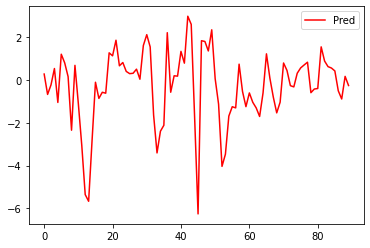

Predicted ROI 0.050965551088640676


In [30]:
y_linear = lr.predict(x)
        
x= np.reshape(x, (x.shape[0], x.shape[1], 1))

y_lstm = model.predict(x)

y_lstm = np.reshape(y_lstm,y_lstm.shape[0])

y_pred = y_linear + y_lstm

plt.plot(y_pred,c="red",label="Pred")
plt.legend()
plt.show()

print("Predicted ROI", np.median(y_pred))
#print("Actual ROI", np.median(y_test))

In [ ]:
y_pred[:10]

In [207]:
def testing(symbol):
    data = get_history(symbol=symbol, start=start, end=end)
    
    data=preprocess(data)
    
    x = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values


    if len(data)>0:

            #x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.25)

            x = sc.fit_transform(x)
            model = LSTM_model()
            model.compile(optimizer='adam',loss='mean_squared_error')

            lr = LinearRegression()

            lr.fit(x,y)

            x = np.reshape(x, (x.shape[0], x.shape[1], 1))

            model.fit(x, y, epochs=10, batch_size = 32)

            y_pred_linear = lr.predict(x)

            x = np.reshape(x, (x.shape[0], x_test.shape[1], 1))

            y_pred_lstm = model.predict(x_test)

            y_pred_lstm = np.reshape(y_pred_lstm,y_pred_lstm.shape[0])

            y_pred = y_pred_linear + y_pred_lstm

            plt.plot(y_pred,c="red",label="Pred")
            plt.legend()
            plt.show()

            print("Predicted ROI", np.median(y_pred))
            
    return data

In [ ]:
for symbol in IT:
    print(symbol)
    data=testing(symbol)
    
    if(data.shape[0]==0):
        continue
    
    features=['High','Close','Volume','%Deliverble']
    
    new_data=predict_90(data,features)
    
    start_1=end+timedelta(1)
    end_1=end+timedelta(90)
    print(start_1,end_1)
    data90=get_history(symbol=symbol, start=start_1, end=end_1)
    data90=preprocessing(data90,start_1,end_1)
    
    
    for col in features:
        plt.figure(figsize=(14,7))
        plt.plot(data90[col],label="Actual",c='blue')
        plt.plot(new_data[col],label='Predicted',c='green')
        plt.title(f"Actual {col} vs Predicted {col}")
        plt.legend()
        plt.show()
    
    data90['Returns'] = ((data90['Close']-data90['Open'])/(data90['Open']))*100
    
    x=new_data.values
    y_test=data90['Returns'].values
    
    x=sc.transform(x)
    
    y_linear = lr.predict(x)
        
    x= np.reshape(x, (x.shape[0], x.shape[1], 1))

    y_lstm = model.predict(x)

    y_lstm = np.reshape(y_lstm,y_lstm.shape[0])

    y_pred = y_linear + y_lstm

    plt.plot(y_pred,c="red",label="Pred")
    plt.plot(y_test,c="green",label="Test")
    plt.legend()
    plt.show()

    print("Predicted ROI", np.median(y_pred))
    print("Actual ROI", np.median(y_test))


In [61]:
chem=pd.DataFrame()

chem_company=[]
chem_close=[]
chem_pred_close=[]
chem_roi=[]
chem_best_date = []

for symbol in CHEM:
    print(symbol)
    data = get_history(symbol=symbol, start=start, end=end)
    data=preprocess(data)
    
    if(data.shape[0]==0):
        continue
    
    features=['High','Close','Volume','%Deliverble']
    
    new_data=predict_90(data,features)
    
    start_1=end+timedelta(1)
    end_1=end+timedelta(90)
    print(start_1,end_1)
    #data90=get_history(symbol=symbol, start=start_1, end=end_1)
    #data90=preprocessing(data90,start_1,end_1)
    
    
    #data90['Returns'] = ((data90['Close']-data90['Open'])/(data90['Open']))*100
    
    x=new_data.values
    #y_test=data90['Returns'].values
    
    x=sc.transform(x)
    
    y_linear = lr.predict(x)
        
    x= np.reshape(x, (x.shape[0], x.shape[1], 1))

    y_lstm = model.predict(x)

    y_lstm = np.reshape(y_lstm,y_lstm.shape[0])

    y_pred = y_linear + y_lstm

    #plt.plot(y_pred,c="red",label="Pred")
    #plt.plot(y_test,c="green",label="Test")
    #plt.legend()
    #plt.show()
    
    #chem.loc[symbol]=[np.median(y_pred)]

    print("Predicted ROI", np.median(y_pred))
    #print("Actual ROI", np.median(y_test))
    
    chem_company.append(symbol)
    chem_close.append(data['Close'].iloc[-1])
    chem_pred_close.append(new_data['Close'].iloc[-1])
    chem_roi.append(np.median(y_pred))
    index = np.where(y_pred == max(y_pred))[0][0]
    chem_best_date.append(new_data.index[index])

    
chem["Company"]=chem_company
chem["Close"]=chem_close
chem["Close90"]=chem_pred_close
chem["ROI"]=chem_roi
chem["Best Selling Date Approx"]  = chem_best_date

AARTIIND
               High    Close    Volume  %Deliverble   Returns
date                                                         
2021-01-10  1303.90  1298.45  204074.0       0.4730  0.655039
2021-01-11  1303.90  1298.45  204074.0       0.4730  0.655039
2021-01-12  1320.05  1283.05  440596.0       0.3562 -1.824929
2021-01-13  1291.55  1281.15  492339.0       0.7025 -0.299611
2021-01-14  1287.45  1265.15  276643.0       0.5212 -1.191034
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted ROI 0.9824859781396238
ALKALI
             High  Close     Volume  %Deliverble    Returns
date                                                       
2021-01-10  57.00  55.15   171971.0       0.6270  -1.517857
2021-01-11  57.00  55.15   171971.0       0.6270  -1.517857
2021-01-12  66.15  64.90  1083053.0       0.2408  15.996425
2021-01-13  68.45  63.50  1164858.0       0.2017  -5.223881
2021-01-14  64.70  61.90    89956.0       0.4433  -3.281250
High
Close
Volume
%Deliverble
2023-01-11 2023

In [62]:
chem

,Company,Close,Close90,ROI,Best Selling Date Approx
0,AARTIIND,600.05,717.460876,0.982486,2023-01-25
1,ALKALI,159.80,141.813126,-7.148641,2023-04-04
2,ALKYLAMINE,2683.10,3189.780518,18.530582,2023-04-03
3,ASTEC,1707.65,1832.303467,11.355918,2023-02-25
4,BALAMINES,2567.85,2924.798340,17.608666,2023-04-05
5,BASF,2747.80,2843.670166,16.045309,2023-02-07
6,BAYERCROP,4719.15,4896.723145,32.852490,2023-01-26
7,BHARATRAS,9519.70,11172.026367,19.828441,2023-02-06
8,CAMLINFINE,154.40,142.510590,-3.297456,2023-03-04
9,CHEMBOND,249.85,225.781143,-2.897731,2023-01-14


In [63]:
chem.to_csv("Chem_sector.csv")

In [65]:
it=pd.DataFrame()

it_company=[]
it_close=[]
it_pred_close=[]
it_roi=[]
it_best_date = []

for symbol in IT:
    print(symbol)
    data = get_history(symbol=symbol, start=start, end=end)
    data=preprocess(data)
    
    if(data.shape[0]==0):
        continue
    
    features=['High','Close','Volume','%Deliverble']
    
    new_data=predict_90(data,features)
    
    start_1=end+timedelta(1)
    end_1=end+timedelta(90)
    print(start_1,end_1)
    #data90=get_history(symbol=symbol, start=start_1, end=end_1)
    #data90=preprocessing(data90,start_1,end_1)
    
    
    #data90['Returns'] = ((data90['Close']-data90['Open'])/(data90['Open']))*100
    
    x=new_data.values
    #y_test=data90['Returns'].values
    
    x=sc.transform(x)
    
    y_linear = lr.predict(x)
        
    x= np.reshape(x, (x.shape[0], x.shape[1], 1))

    y_lstm = model.predict(x)

    y_lstm = np.reshape(y_lstm,y_lstm.shape[0])

    y_pred = y_linear + y_lstm

    #plt.plot(y_pred,c="red",label="Pred")
    #plt.plot(y_test,c="green",label="Test")
    #plt.legend()
    #plt.show()
    
    #chem.loc[symbol]=[np.median(y_pred)]

    print("Predicted ROI", np.median(y_pred))
    #print("Actual ROI", np.median(y_test))
    
    it_company.append(symbol)
    it_close.append(data['Close'].iloc[-1])
    it_pred_close.append(new_data['Close'].iloc[-1])
    it_roi.append(np.median(y_pred))
    index = np.where(y_pred == max(y_pred))[0][0]
    it_best_date.append(new_data.index[index])

    
it["Company"]=it_company
it["Close"]=it_close
it["Close90"]=it_pred_close
it["ROI"]=it_roi
it["Best Selling Date Approx"]  = it_best_date

3IINFOLTD
Empty DataFrame
Columns: [High, Close, Volume, %Deliverble, Returns]
Index: []
63MOONS
            High  Close   Volume  %Deliverble  Returns
date                                                  
2021-01-10  78.0   77.4  45785.0       0.7052  0.71568
2021-01-11  78.0   77.4  45785.0       0.7052  0.71568
2021-01-12  78.0   77.4  45785.0       0.7052  0.71568
2021-01-13  78.0   77.4  45785.0       0.7052  0.71568
2021-01-14  78.0   77.4  45785.0       0.7052  0.71568
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted ROI -4.0652308157454
ACCELYA
              High   Close   Volume  %Deliverble   Returns
date                                                      
2021-01-10  987.45  961.40   5173.0       0.5676 -1.394872
2021-01-11  987.45  961.40   5173.0       0.5676 -1.394872
2021-01-12  969.95  961.65   3325.0       0.5125 -0.393599
2021-01-13  997.55  968.75  16768.0       0.3247 -0.834272
2021-01-14  976.95  962.45   3428.0       0.5831 -0.675955
High
Close
Vol

In [66]:
it

,Company,Close,Close90,ROI,Best Selling Date Approx
0,63MOONS,168.25,188.806152,-4.065231,2023-01-17
1,ACCELYA,1420.00,1356.678589,7.562217,2023-03-08
2,AIRAN,16.55,19.298780,-3.625591,2023-01-19
3,ALLSEC,521.80,538.615295,-2.592741,2023-01-13
4,APTECHT,374.10,362.397644,-2.638027,2023-04-03
5,AURIONPRO,368.40,365.307434,-4.789780,2023-02-01
6,AURUM,118.15,143.139801,-3.502650,2023-04-05
7,BBOX,136.25,146.928146,-2.438701,2023-03-22
8,DUCON,14.00,21.174067,-3.668246,2023-04-09
9,HCL-INSYS,16.45,20.009352,-3.606434,2023-03-09


In [67]:
it.to_csv("IT_Sector.csv")

In [70]:
iron_and_steel=pd.DataFrame()

iron_and_steel_company=[]
iron_and_steel_close=[]
iron_and_steel_pred_close=[]
iron_and_steel_roi=[]
iron_and_steel_best_date =[]
for symbol in IRON_AND_STEEL:
    print(symbol)
    data = get_history(symbol=symbol, start=start, end=end)
    data=preprocess(data)
    
    if(data.shape[0]==0):
        continue
    
    features=['High','Close','Volume','%Deliverble']
    
    new_data=predict_90(data,features)
    
    start_1=end+timedelta(1)
    end_1=end+timedelta(90)
    print(start_1,end_1)
    #data90=get_history(symbol=symbol, start=start_1, end=end_1)
    #data90=preprocessing(data90,start_1,end_1)
    
    
    #data90['Returns'] = ((data90['Close']-data90['Open'])/(data90['Open']))*100
    
    x=new_data.values
    #y_test=data90['Returns'].values
    
    x=sc.transform(x)
    
    y_linear = lr.predict(x)
        
    x= np.reshape(x, (x.shape[0], x.shape[1], 1))

    y_lstm = model.predict(x)

    y_lstm = np.reshape(y_lstm,y_lstm.shape[0])

    y_pred = y_linear + y_lstm

    #plt.plot(y_pred,c="red",label="Pred")
    #plt.plot(y_test,c="green",label="Test")
    #plt.legend()
    #plt.show()
    
    #chem.loc[symbol]=[np.median(y_pred)]

    print("Predicted ROI", np.mean(y_pred))
    #print("Actual ROI", np.median(y_test))
    
    iron_and_steel_company.append(symbol)
    iron_and_steel_close.append(data['Close'].iloc[-1])
    iron_and_steel_pred_close.append(new_data['Close'].iloc[-1])
    iron_and_steel_roi.append(np.median(y_pred))
    index = np.where(y_pred == max(y_pred))[0][0]
    iron_and_steel_best_date.append(new_data.index[index])

    
iron_and_steel["Company"]=iron_and_steel_company
iron_and_steel["Close"]=iron_and_steel_close
iron_and_steel["Close90"]=iron_and_steel_pred_close
iron_and_steel["ROI"]=iron_and_steel_roi
iron_and_steel["Best Selling Date Approx"]  = iron_and_steel_best_date

APLAPOLLO
             High   Close    Volume  %Deliverble   Returns
date                                                      
2021-01-10  987.9  966.45  614462.0       0.7767 -0.764966
2021-01-11  987.9  966.45  614462.0       0.7767 -0.764966
2021-01-12  971.0  963.95  265300.0       0.6840 -0.418388
2021-01-13  973.0  950.25  726796.0       0.8673 -1.934985
2021-01-14  977.0  956.75  229758.0       0.6733  1.232674
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted ROI 3.504065837115409
BHARATWIRE
             High  Close   Volume  %Deliverble   Returns
date                                                    
2021-01-10  36.50  34.60  21605.0       0.5602 -3.888889
2021-01-11  36.50  34.60  21605.0       0.5602 -3.888889
2021-01-12  35.60  35.20  26269.0       0.5921  1.440922
2021-01-13  37.95  36.20  57644.0       0.5058  2.549575
2021-01-14  37.10  35.25  19988.0       0.6446 -2.624309
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted ROI -3.36864829367756

In [71]:
iron_and_steel

,Company,Close,Close90,ROI,Best Selling Date Approx
0,APLAPOLLO,1112.85,1130.992310,3.088380,2023-02-01
1,BHARATWIRE,104.55,103.914322,-3.349380,2023-03-03
2,DPWIRES,410.60,417.693542,-2.426225,2023-02-03
3,GAL,3.45,3.603828,-3.672216,2023-01-02
4,GALLANTT,63.15,70.792946,-3.647699,2023-01-31
5,GALLISPAT,64.15,63.319820,-3.775611,2022-08-05
6,GANDHITUBE,520.25,511.190735,-2.794862,2023-04-01
7,GOODLUCK,375.75,327.073669,-1.481835,2023-02-01
8,GPIL,397.75,476.387573,-2.039748,2023-04-08
9,HISARMETAL,144.15,143.907211,-5.766607,2023-02-04


In [72]:
iron_and_steel.to_csv("Iron_And_Steel_Sector.csv")

In [73]:
const=pd.DataFrame()

const_company=[]
const_close=[]
const_pred_close=[]
const_roi=[]
const_best_date =[]
for symbol in CONST:
    print(symbol)
    data = get_history(symbol=symbol, start=start, end=end)
    data=preprocess(data)
    
    if(data.shape[0]==0):
        continue
    
    features=['High','Close','Volume','%Deliverble']
    
    new_data=predict_90(data,features)
    
    start_1=end+timedelta(1)
    end_1=end+timedelta(90)
    print(start_1,end_1)
    #data90=get_history(symbol=symbol, start=start_1, end=end_1)
    #data90=preprocessing(data90,start_1,end_1)
    
    
    #data90['Returns'] = ((data90['Close']-data90['Open'])/(data90['Open']))*100
    
    x=new_data.values
    #y_test=data90['Returns'].values
    
    x=sc.transform(x)
    
    y_linear = lr.predict(x)
        
    x= np.reshape(x, (x.shape[0], x.shape[1], 1))

    y_lstm = model.predict(x)

    y_lstm = np.reshape(y_lstm,y_lstm.shape[0])

    y_pred = y_linear + y_lstm

    #plt.plot(y_pred,c="red",label="Pred")
    #plt.plot(y_test,c="green",label="Test")
    #plt.legend()
    #plt.show()
    
    #chem.loc[symbol]=[np.median(y_pred)]

    print("Predicted ROI", np.mean(y_pred))
    #print("Actual ROI", np.median(y_test))
    
    const_company.append(symbol)
    const_close.append(data['Close'].iloc[-1])
    const_pred_close.append(new_data['Close'].iloc[-1])
    const_roi.append(np.median(y_pred))
    index = np.where(y_pred == max(y_pred))[0][0]
    const_best_date.append(new_data.index[index])

    
const["Company"]=const_company
const["Close"]=const_close
const["Close90"]=const_pred_close
const["ROI"]=const_roi
const["Best Selling Date Approx"]  = const_best_date

AGI
             High   Close    Volume  %Deliverble   Returns
date                                                      
2021-01-10  123.4  117.20  258838.0       0.6065 -5.024311
2021-01-11  123.4  117.20  258838.0       0.6065 -5.024311
2021-01-12  121.9  120.85  161982.0       0.5787  3.114334
2021-01-13  123.8  118.05  152813.0       0.4421 -3.198032
2021-01-14  118.7  116.80   85346.0       0.5683 -1.058873
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted ROI -2.741780603881354
AHLUCONT
              High   Close     Volume  %Deliverble   Returns
date                                                        
2021-01-10  270.55  266.35    88814.0       0.5519  0.018776
2021-01-11  270.55  266.35    88814.0       0.5519  0.018776
2021-01-12  269.00  264.50    64136.0       0.8400 -0.750469
2021-01-13  268.00  262.95    23483.0       0.5139 -0.848416
2021-01-14  277.85  272.50  3575820.0       0.9655  4.426135
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted 

In [74]:
const

,Company,Close,Close90,ROI,Best Selling Date Approx
0,AGI,326.15,322.771240,-2.781814,2023-01-19
1,AHLUCONT,517.95,536.178711,2.142187,2023-03-16
2,AJMERA,319.25,351.670044,-3.028624,2023-01-15
3,AMJLAND,29.50,32.412430,-3.718372,2023-03-06
4,ANANTRAJ,115.70,113.499138,-3.426333,2023-02-05
...,...,...,...,...,...
74,TCIDEVELOP,389.00,333.595093,-1.445957,2022-12-11
75,TECHIN,10.65,13.746519,-3.785879,2023-04-02
76,TEXINFRA,59.15,65.276367,-3.430016,2023-02-15
77,VASCONEQ,33.85,29.351883,-3.461878,2023-02-26


In [75]:
const.to_csv("const_sector.csv")

In [76]:
textile=pd.DataFrame()

textile_company=[]
textile_close=[]
textile_pred_close=[]
textile_roi=[]
textile_best_date =[]
for symbol in TEXTILE:
    print(symbol)
    data = get_history(symbol=symbol, start=start, end=end)
    data=preprocess(data)
    
    if(data.shape[0]==0):
        continue
    
    features=['High','Close','Volume','%Deliverble']
    
    new_data=predict_90(data,features)
    
    start_1=end+timedelta(1)
    end_1=end+timedelta(90)
    print(start_1,end_1)
    #data90=get_history(symbol=symbol, start=start_1, end=end_1)
    #data90=preprocessing(data90,start_1,end_1)
    
    
    #data90['Returns'] = ((data90['Close']-data90['Open'])/(data90['Open']))*100
    
    x=new_data.values
    #y_test=data90['Returns'].values
    
    x=sc.transform(x)
    
    y_linear = lr.predict(x)
        
    x= np.reshape(x, (x.shape[0], x.shape[1], 1))

    y_lstm = model.predict(x)

    y_lstm = np.reshape(y_lstm,y_lstm.shape[0])

    y_pred = y_linear + y_lstm

    #plt.plot(y_pred,c="red",label="Pred")
    #plt.plot(y_test,c="green",label="Test")
    #plt.legend()
    #plt.show()
    
    #chem.loc[symbol]=[np.median(y_pred)]

    print("Predicted ROI", np.mean(y_pred))
    #print("Actual ROI", np.median(y_test))
    
    textile_company.append(symbol)
    textile_close.append(data['Close'].iloc[-1])
    textile_pred_close.append(new_data['Close'].iloc[-1])
    textile_roi.append(np.median(y_pred))
    index = np.where(y_pred == max(y_pred))[0][0]
    textile_best_date.append(new_data.index[index])

    
textile["Company"]=textile_company
textile["Close"]=textile_close
textile["Close90"]=textile_pred_close
textile["ROI"]=textile_roi
textile["Best Selling Date Approx"]  = textile_best_date

AARVEEDEN
            High  Close   Volume  %Deliverble   Returns
date                                                   
2021-01-10  20.4  19.35  21421.0       0.9465 -5.147059
2021-01-11  20.4  19.35  21421.0       0.9465 -5.147059
2021-01-12  20.4  19.35  21421.0       0.9465 -5.147059
2021-01-13  20.4  19.35  21421.0       0.9465 -5.147059
2021-01-14  20.4  19.35  21421.0       0.9465 -5.147059
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted ROI -3.8350576306433606
AMBIKCO
               High    Close    Volume  %Deliverble   Returns
date                                                         
2021-01-10  1187.35  1129.25  258713.0       0.4422 -1.289336
2021-01-11  1187.35  1129.25  258713.0       0.4422 -1.289336
2021-01-12  1199.90  1173.40  169668.0       0.3591  4.209591
2021-01-13  1195.00  1105.30   63995.0       0.5150 -5.529915
2021-01-14  1125.00  1072.45   45193.0       0.5342 -4.671111
High
Close
Volume
%Deliverble
2023-01-11 2023-04-10
Predicted ROI -5.7

In [77]:
textile

,Company,Close,Close90,ROI,Best Selling Date Approx
0,AARVEEDEN,25.05,27.364244,-3.806366,2023-04-05
1,AMBIKCO,1512.25,1914.066162,-3.925291,2023-02-28
2,ARVIND,88.40,96.921341,-3.305619,2023-02-27
3,ARVINDFASN,336.50,316.108276,-2.271710,2023-02-22
4,ASHIMASYN,17.55,15.829812,-3.650412,2023-02-01
...,...,...,...,...,...
75,VIPCLOTHNG,46.80,46.732887,-3.582962,2023-01-20
76,VTL,310.05,444.391083,-2.837464,2023-03-23
77,WEIZMANIND,115.15,109.511078,-6.946627,2023-02-03
78,WELSPUNIND,72.60,95.605644,-2.927029,2023-03-09


In [78]:
textile.to_csv("textile_sector.csv")